In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 準備模擬資料

In [7]:
# 做一條直線
# f(x) = 1.2x +0.8

In [8]:
x = np.linspace(0, 5, 50)

In [9]:
y = 1.2*x +0.8

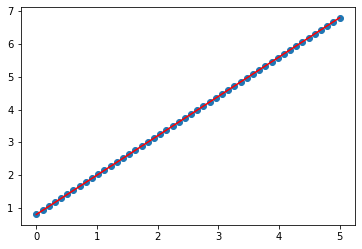

In [11]:
plt.scatter(x, y)
plt.plot(x, y, 'r') #變紅色線，不然會看不出來在畫圖

In [12]:
# 加入noise 使數值看起來更真實

In [13]:
y = 1.2*x +0.8 + 0.6*np.random.randn(50)

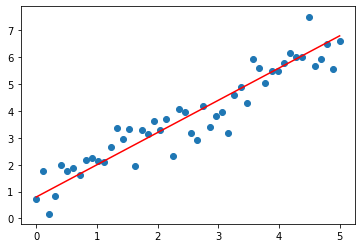

In [16]:
plt.scatter(x, y)
plt.plot(x, 1.2*x +0.8, 'r')

# 用機器學習的sklearn 來做線性迴歸

In [18]:
from sklearn.linear_model import LinearRegression

In [22]:
regr = LinearRegression() #開一台空的線性迴歸機器給他

In [20]:
X = x.reshape(50, 1)

In [24]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
Y = regr.predict(X)

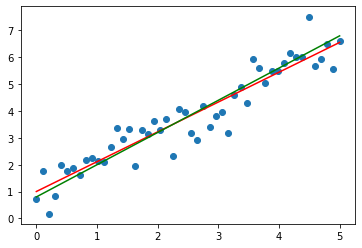

In [29]:
plt.scatter(x, y)
plt.plot(x, Y, 'r')
plt.plot(x, 1.2*x + 0.8, 'g')

# Overfitting

In [30]:
from ipywidgets import interact

In [46]:
x = np.linspace(0, 5, 50)
y = 1.2*x +0.8 + 0.6*np.random.randn(50)

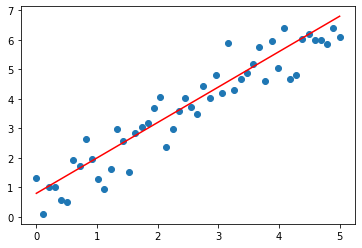

In [47]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

In [44]:
X = np.linspace(0, 5, 1000)

def my_fit(n):
    Y = 4*np.sin(n*X) + 4
    plt.scatter(x, y)
    plt.plot(X, Y, 'r')
    plt.show()

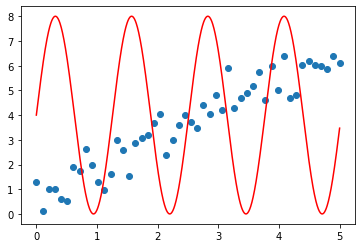

In [48]:
my_fit(5)

In [49]:
interact(my_fit, n = (1, 250))

interactive(children=(IntSlider(value=125, description='n', max=250, min=1), Output()), _dom_classes=('widget-…

<function __main__.my_fit(n)>

In [50]:
x = np.linspace(0, 5, 100)
y = 1.2*x + 0.8 + 0.5*np.random.randn(100)

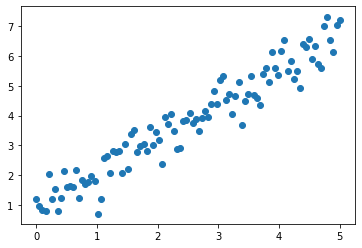

In [51]:
plt.scatter(x, y)

In [52]:
# 標準函數訓練及測試

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# 把資料中的80%給訓練，剩下給測試

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2,
                                                   random_state = 87)

In [57]:
x_train = x_train.reshape(80, 1)

In [58]:
x_test.shape = (20, 1)

In [59]:
x_test

array([[0.80808081],
       [4.09090909],
       [4.29292929],
       [1.61616162],
       [1.96969697],
       [1.26262626],
       [1.31313131],
       [1.46464646],
       [3.28282828],
       [0.35353535],
       [4.24242424],
       [5.        ],
       [2.92929293],
       [3.53535354],
       [4.64646465],
       [3.73737374],
       [0.15151515],
       [0.        ],
       [2.22222222],
       [1.66666667]])

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
regr = LinearRegression()

In [62]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

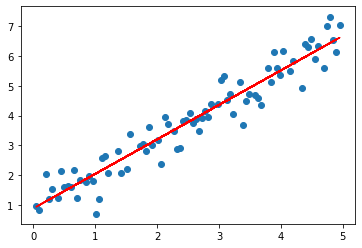

In [63]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regr.predict(x_train), 'r')

In [64]:
# 用測試資料來跑

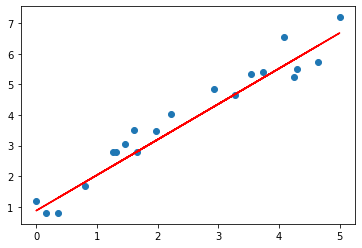

In [65]:
plt.scatter(x_test, y_test)
plt.plot(x_test, regr.predict(x_test), 'r')

In [66]:
# 使用真實數據

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.datasets import load_boston

In [70]:
boston = load_boston()

In [71]:
# 看資料裡有什麼數據 feature

In [72]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [73]:
X = boston.data
Y = boston.target

In [74]:
len(X)

506

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size = 0.3,
                                                   random_state = 87)

In [76]:
regr = LinearRegression()

In [77]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
y_predict = regr.predict(x_test)

Text(0, 0.5, 'Predicted Price')

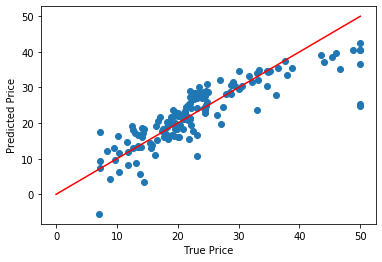

In [80]:
plt.scatter(y_test, y_predict)
plt.plot([0, 50], [0, 50], 'r')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')